In [1]:
from ugropy import abdulelah_gani_t, abdulelah_gani_s, abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(351, 424, 74, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [3]:
for idx, smiles in enumerate(df.index):
    try:
        solution = abdulelah_gani_t.get_groups(smiles, "smiles")
    except Exception as e:
        print(smiles, idx)
        raise e

    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles]
    if isinstance(row, pd.DataFrame):
        row = row.iloc[0]
    row = row[row != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()
    
    # Eliminar las llaves 372 y 373 para la comparación
    row_dict.pop(372, None)
    row_dict.pop(373, None)
    solution_dict = solution.subgroups_numbers.copy()
    solution_dict.pop(372, None)
    solution_dict.pop(373, None)

    # Verificar si ninguna solución tiene subgroups_numbers igual a row_dict
    if solution_dict != row_dict:
        print(smiles)
        print(idx)
        print("Subgrupos:")
        print(str(solution.subgroups))  # Convertir a string y unir con saltos de línea
        print("Subgrupos por número:")
        print(str(solution.subgroups_numbers))  # Convertir a string y unir con saltos de línea
        print("Gani: ")
        print(row_dict)
        
        gani_groups = {}
        for group, ocurr in row_dict.items():
            group_name = abdulelah_gani_t.subgroups_info.loc[abdulelah_gani_t.subgroups_info["group_number"] == group].index[0]
            gani_groups[group_name] = ocurr
            
        print("Gani group names:")
        print(gani_groups)
        
        wrong_smiles = smiles
        break

Clc1ccc(cc1)NC2=CC3=Nc4ccccc4N(c5ccc(Cl)cc5)C3=CC2=N
4055
Subgrupos:
{'aC-NH-aC (different rings)': 1, 'AROM.FUSED[2]': 1, 'AROM.FUSED[2]s2s3': 1}
Subgrupos por número:
{393: 1, 401: 1, 404: 1}
Gani: 
{392: 1, 395: 1, 401: 1}
Gani group names:
{'aC-NHncyc (fused rings) (n in 0..1)': 1, 'aC-(N=CHn)cyc (fused rings) (n in 0..1)': 1, 'AROM.FUSED[2]': 1}


In [4]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

abdulelah_gani_t.detect_fragments(mol)

{'aC-aC (different rings)_0': (10, 26),
 'aC-NH-aC (different rings)_0': (4, 7, 8),
 'AROM.FUSED[2]_0': (13, 14, 15, 16, 17, 12),
 'AROM.FUSED[2]s2s3_0': (9, 8, 28, 27, 26, 10)}

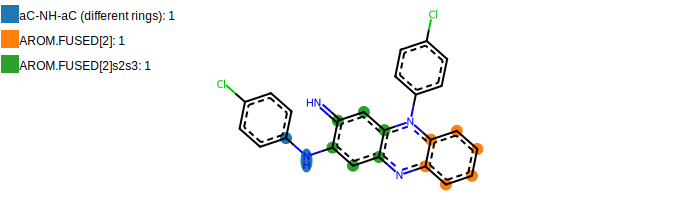

In [5]:
sol = abdulelah_gani_t.get_groups(wrong_smiles, "smiles")

sol.draw(width=700)

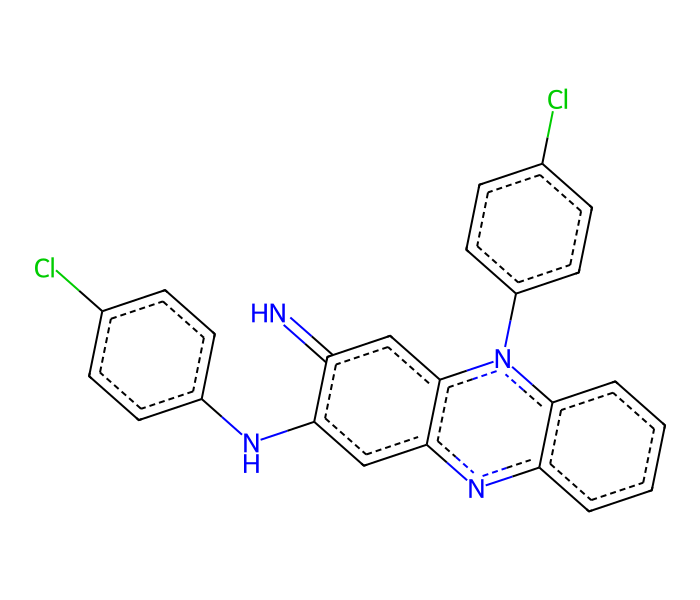

In [6]:
abdulelah_gani_p.get_groups(wrong_smiles, "smiles").draw(width=700, height=600)

1


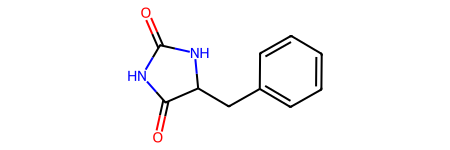

In [7]:
idx = 10

ocurr = df[df[369]>0][369].values[idx]
print(ocurr)
smiles = df[df[369]>0].index[idx]

mol = instantiate_mol_object(smiles, "smiles")

mol

In [8]:
column_sums = df.sum()

# Identificar columnas cuya suma es igual a 0
columns_with_zero_sum = column_sums[column_sums == 0].index.tolist()

In [9]:
columns_with_zero_sum

[355, 356, 357, 358, 360, 361, 363, 371, 376, 383, 390, 413]